In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "hnsc-data"

In [2]:
library(tidyverse) # metapackage of all tidyverse packages


In [3]:
list.files(path = "../input/hnsc-data/hnsc_rnaseq_full_counts.RData")


character(0)

In [4]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

if (!require("DESeq2", character.only=T, quietly=F)) {
  BiocManager::install("DESeq2")
  library("DESeq2")
}


Loading required package: DESeq2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DESeq2’”
Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'DESeq2'

also installing the dependencies ‘GenomeInfoDbData’, ‘zlibbioc’, ‘GenomeInfoDb’, ‘XVector’, ‘DelayedArray’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘geneplotter’


Old packages: 'astsa', 'backports', 'BART', 'bayestestR', 'BMA', 'broom',
  'cld2', 'clusterGeneration', 'colourvalues', 'compareGroups', 'config',
  'd3Tree', 'data.table', 'Deriv', 'DescTools', 'doFuture', 'effectsize',
  'emmeans', 'epiR', 'ExPanDaR', 'FactoInvestigate', 'FactoMineR', 'fda',
  'feasts', 'fitdistrplus', 'flextable', 'foghorn', 'forestplot', 'fpc',
  'future', 'geepack', 'ggalluvial', 'ggeffects', 'gghighlight', 'ggrepel',
  'ggstance', 'ggt

In [5]:
library(DESeq2)

load("../input/hnsc-data/hnsc_rnaseq_full_counts.RData")
head(hnsc.exp)[,1:3]
colData(hnsc.exp)
colnames(colData(hnsc.exp))
unique(hnsc.exp$definition)

class: RangedSummarizedExperiment 
dim: 6 3 
metadata(1): data_release
assays(1): HTSeq - Counts
rownames(6): ENSG00000000003 ENSG00000000005 ... ENSG00000000460
  ENSG00000000938
rowData names(3): ensembl_gene_id external_gene_name
  original_ensembl_gene_id
colnames(3): TCGA-D6-6515-01A-21R-1873-07 TCGA-CV-7180-01A-11R-2016-07
  TCGA-CV-7183-01A-11R-2016-07
colData names(77): barcode patient ... paper_Copy.Number paper_PARADIGM

DataFrame with 546 rows and 77 columns
                                                  barcode      patient
                                              <character>  <character>
TCGA-D6-6515-01A-21R-1873-07 TCGA-D6-6515-01A-21R-1873-07 TCGA-D6-6515
TCGA-CV-7180-01A-11R-2016-07 TCGA-CV-7180-01A-11R-2016-07 TCGA-CV-7180
TCGA-CV-7183-01A-11R-2016-07 TCGA-CV-7183-01A-11R-2016-07 TCGA-CV-7183
TCGA-CV-A6JN-01A-11R-A31N-07 TCGA-CV-A6JN-01A-11R-A31N-07 TCGA-CV-A6JN
TCGA-CQ-7069-01A-11R-2403-07 TCGA-CQ-7069-01A-11R-2403-07 TCGA-CQ-7069
...                                                   ...          ...
TCGA-CQ-5334-01A-01R-1686-07 TCGA-CQ-5334-01A-01R-1686-07 TCGA-CQ-5334
TCGA-CR-7402-01A-11R-2016-07 TCGA-CR-7402-01A-11R-2016-07 TCGA-CR-7402
TCGA-CR-7389-01A-11R-2016-07 TCGA-CR-7389-01A-11R-2016-07 TCGA-CR-7389
TCGA-BA-6868-01B-12R-1915-07 TCGA-BA-6868-01B-12R-1915-07 TCGA-BA-6868
TCGA-CR-6488-01A-12R-2081-07 TCGA-CR-6488-01A-12R-2081-07 TCGA-CR-6488
                                      

[1] "barcode"                     "patient"                    
 [3] "sample"                      "shortLetterCode"            
 [5] "definition"                  "sample_submitter_id"        
 [7] "tissue_type"                 "oct_embedded"               
 [9] "intermediate_dimension"      "longest_dimension"          
[11] "initial_weight"              "sample_type_id"             
[13] "pathology_report_uuid"       "days_to_collection"         
[15] "state"                       "sample_id"                  
[17] "sample_type"                 "shortest_dimension"         
[19] "submitter_id"                "is_ffpe"                    
[21] "site_of_resection_or_biopsy" "last_known_disease_status"  
[23] "ajcc_pathologic_t"           "ajcc_pathologic_m"          
[25] "year_of_diagnosis"           "ajcc_clinical_stage"        
[27] "treatments"                  "ajcc_clinical_n"            
[29] "icd_10_code"                 "progression_or_recurrence"  
[31] "ajcc_clinical_m"             "prior_malignancy"           
[33] "primary_diagnosis"           "tumor_stage"                
[35] "classification_of_tumor"     "ajcc_pathologic_n"          
[37] "morphology"                  "ajcc_staging_system_edition"
[39] "diagnosis_id"                "tumor_grade"                
[41] "prior_treatment"             "days_to_diagnosis"          
[43] "days_to_last_follow_up"      "ajcc_clinical_t"            
[45] "synchronous_malignancy"      "ajcc_pathologic_stage"      
[47] "tissue_or_organ_of_origin"   "age_at_diagnosis"           
[49] "cigarettes_per_day"          "alcohol_history"            
[51] "years_smoked"                "exposure_id"                
[53] "pack_years_smoked"           "gender"                     
[55] "race"                        "age_at_index"               
[57] "days_to_birth"               "demographic_id"             
[59] "vital_status"                "year_of_birth"              
[61] "year_of_death"               "ethnicity"                  
[63] "days_to_death"               "bcr_patient_barcode"        
[65] "primary_site"                "releasable"                 
[67] "project_id"                  "disease_type"               
[69] "name"                        "released"                   
[71] "paper_patient"               "paper_RNA"                  
[73] "paper_Methylation"           "paper_RPPA"                 
[75] "paper_miRNA"                 "paper_Copy.Number"          
[77] "paper_PARADIGM"

[1] "Primary solid Tumor" "Solid Tissue Normal" "Metastatic"

In [6]:
hnsc.exp$definition = ifelse(hnsc.exp$definition == "Primary solid Tumor", "PST_hnsc", ifelse(hnsc.exp$definition == "Solid Tissue Normal", "STN_hnsc", "Metastatic"))
unique(hnsc.exp$definition)

counts_hnsc <- as.matrix(assay(hnsc.exp))

head(counts_hnsc)[,1:3]


[1] "PST_hnsc"   "STN_hnsc"   "Metastatic"

,TCGA-D6-6515-01A-21R-1873-07,TCGA-CV-7180-01A-11R-2016-07,TCGA-CV-7183-01A-11R-2016-07
ENSG00000000003,1027,1700,1344
ENSG00000000005,0,0,0
ENSG00000000419,1649,2073,1358
ENSG00000000457,689,280,400
ENSG00000000460,494,292,262
ENSG00000000938,1475,93,45


In [7]:
coldata_hnsc <- colData(hnsc.exp)
coldata_hnsc= as.data.frame(coldata_hnsc)
head(coldata_hnsc)

colnames(colData(hnsc.exp))


,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,tissue_type,oct_embedded,intermediate_dimension,longest_dimension,⋯,disease_type,name,released,paper_patient,paper_RNA,paper_Methylation,paper_RPPA,paper_miRNA,paper_Copy.Number,paper_PARADIGM
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<I<list>>,<chr>,<lgl>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
TCGA-D6-6515-01A-21R-1873-07,TCGA-D6-6515-01A-21R-1873-07,TCGA-D6-6515,TCGA-D6-6515-01A,TP,PST_hnsc,TCGA-D6-6515-01A,Not Reported,NA,0.9,1.2,⋯,Squamous....,Head and Neck Squamous Cell Carcinoma,TRUE,TCGA-D6-6515,Mesenchymal,hyper-methylated,1,4,3,1
TCGA-CV-7180-01A-11R-2016-07,TCGA-CV-7180-01A-11R-2016-07,TCGA-CV-7180,TCGA-CV-7180-01A,TP,PST_hnsc,TCGA-CV-7180-01A,Not Reported,NA,0.6,1.2,⋯,Squamous....,Head and Neck Squamous Cell Carcinoma,TRUE,TCGA-CV-7180,Basal,hyper-methylated,1,2,2,4
TCGA-CV-7183-01A-11R-2016-07,TCGA-CV-7183-01A-11R-2016-07,TCGA-CV-7183,TCGA-CV-7183-01A,TP,PST_hnsc,TCGA-CV-7183-01A,Not Reported,NA,0.7,1.0,⋯,Squamous....,Head and Neck Squamous Cell Carcinoma,TRUE,TCGA-CV-7183,Basal,CpG island hyper-methylated,2,2,3,2
TCGA-CV-A6JN-01A-11R-A31N-07,TCGA-CV-A6JN-01A-11R-A31N-07,TCGA-CV-A6JN,TCGA-CV-A6JN-01A,TP,PST_hnsc,TCGA-CV-A6JN-01A,Not Reported,false,NA,NA,⋯,Squamous....,Head and Neck Squamous Cell Carcinoma,TRUE,NA,NA,NA,NA,NA,NA,NA
TCGA-CQ-7069-01A-11R-2403-07,TCGA-CQ-7069-01A-11R-2403-07,TCGA-CQ-7069,TCGA-CQ-7069-01A,TP,PST_hnsc,TCGA-CQ-7069-01A,Not Reported,NA,0.3,0.6,⋯,Squamous....,Head and Neck Squamous Cell Carcinoma,TRUE,NA,NA,NA,NA,NA,NA,NA
TCGA-CQ-6219-01A-11R-1915-07,TCGA-CQ-6219-01A-11R-1915-07,TCGA-CQ-6219,TCGA-CQ-6219-01A,TP,PST_hnsc,TCGA-CQ-6219-01A,Not Reported,NA,0.6,0.6,⋯,Squamous....,Head and Neck Squamous Cell Carcinoma,TRUE,NA,NA,NA,NA,NA,NA,NA


[1] "barcode"                     "patient"                    
 [3] "sample"                      "shortLetterCode"            
 [5] "definition"                  "sample_submitter_id"        
 [7] "tissue_type"                 "oct_embedded"               
 [9] "intermediate_dimension"      "longest_dimension"          
[11] "initial_weight"              "sample_type_id"             
[13] "pathology_report_uuid"       "days_to_collection"         
[15] "state"                       "sample_id"                  
[17] "sample_type"                 "shortest_dimension"         
[19] "submitter_id"                "is_ffpe"                    
[21] "site_of_resection_or_biopsy" "last_known_disease_status"  
[23] "ajcc_pathologic_t"           "ajcc_pathologic_m"          
[25] "year_of_diagnosis"           "ajcc_clinical_stage"        
[27] "treatments"                  "ajcc_clinical_n"            
[29] "icd_10_code"                 "progression_or_recurrence"  
[31] "ajcc_clinical_m"             "prior_malignancy"           
[33] "primary_diagnosis"           "tumor_stage"                
[35] "classification_of_tumor"     "ajcc_pathologic_n"          
[37] "morphology"                  "ajcc_staging_system_edition"
[39] "diagnosis_id"                "tumor_grade"                
[41] "prior_treatment"             "days_to_diagnosis"          
[43] "days_to_last_follow_up"      "ajcc_clinical_t"            
[45] "synchronous_malignancy"      "ajcc_pathologic_stage"      
[47] "tissue_or_organ_of_origin"   "age_at_diagnosis"           
[49] "cigarettes_per_day"          "alcohol_history"            
[51] "years_smoked"                "exposure_id"                
[53] "pack_years_smoked"           "gender"                     
[55] "race"                        "age_at_index"               
[57] "days_to_birth"               "demographic_id"             
[59] "vital_status"                "year_of_birth"              
[61] "year_of_death"               "ethnicity"                  
[63] "days_to_death"               "bcr_patient_barcode"        
[65] "primary_site"                "releasable"                 
[67] "project_id"                  "disease_type"               
[69] "name"                        "released"                   
[71] "paper_patient"               "paper_RNA"                  
[73] "paper_Methylation"           "paper_RPPA"                 
[75] "paper_miRNA"                 "paper_Copy.Number"          
[77] "paper_PARADIGM"

In [8]:
unique(hnsc.exp$definition)
unique(coldata_hnsc$definition)

coldata_hnsc1 <- coldata_hnsc[,c("definition")]
coldata_hnsc1 = as.data.frame(coldata_hnsc1)

rownames(coldata_hnsc1) = rownames(coldata_hnsc)
colnames(coldata_hnsc1) = c("definition")

head(coldata_hnsc1)

[1] "PST_hnsc"   "STN_hnsc"   "Metastatic"

[1] "PST_hnsc"   "STN_hnsc"   "Metastatic"

,definition
,<fct>
TCGA-D6-6515-01A-21R-1873-07,PST_hnsc
TCGA-CV-7180-01A-11R-2016-07,PST_hnsc
TCGA-CV-7183-01A-11R-2016-07,PST_hnsc
TCGA-CV-A6JN-01A-11R-A31N-07,PST_hnsc
TCGA-CQ-7069-01A-11R-2403-07,PST_hnsc
TCGA-CQ-6219-01A-11R-1915-07,PST_hnsc


In [9]:
rownames(coldata_hnsc[which(coldata_hnsc1$definition == "STN_hnsc"),])


[1] "TCGA-CV-7238-11A-01R-2016-07" "TCGA-CV-6943-11A-01R-1915-07"
 [3] "TCGA-CV-6938-11A-01R-1915-07" "TCGA-CV-7250-11A-01R-2016-07"
 [5] "TCGA-CV-6935-11A-01R-1915-07" "TCGA-H7-A6C5-11A-11R-A30B-07"
 [7] "TCGA-CV-6933-11A-01R-1915-07" "TCGA-HD-8635-11A-01R-2403-07"
 [9] "TCGA-CV-6960-11A-01R-2016-07" "TCGA-CV-7103-11A-01R-2016-07"
[11] "TCGA-CV-7183-11A-01R-2016-07" "TCGA-CV-7437-11A-01R-2132-07"
[13] "TCGA-CV-6962-11A-01R-1915-07" "TCGA-CV-7423-11A-01R-2081-07"
[15] "TCGA-CV-7406-11A-01R-2081-07" "TCGA-HD-A6I0-11A-11R-A31N-07"
[17] "TCGA-CV-7440-11A-01R-2187-07" "TCGA-CV-7097-11A-01R-2016-07"
[19] "TCGA-H7-A6C4-11A-21R-A466-07" "TCGA-CV-7178-11A-01R-2016-07"
[21] "TCGA-CV-7425-11A-01R-2081-07" "TCGA-CV-6934-11A-01R-1915-07"
[23] "TCGA-WA-A7GZ-11A-11R-A34R-07" "TCGA-CV-7101-11A-01R-2016-07"
[25] "TCGA-CV-7235-11A-01R-2016-07" "TCGA-HD-A6HZ-11A-11R-A31N-07"
[27] "TCGA-CV-6956-11A-01R-2016-07" "TCGA-CV-7438-11A-01R-2132-07"
[29] "TCGA-CV-7177-11A-01R-2016-07" "TCGA-CV-6936-11A-01R-1915-07"
[31] "TCGA-CV-7245-11A-01R-2016-07" "TCGA-CV-7261-11A-01R-2016-07"
[33] "TCGA-CV-7091-11A-01R-2016-07" "TCGA-CV-7255-11A-01R-2016-07"
[35] "TCGA-CV-7252-11A-01R-2016-07" "TCGA-CV-7434-11A-01R-2132-07"
[37] "TCGA-CV-7424-11A-01R-2081-07" "TCGA-CV-7242-11A-01R-2016-07"
[39] "TCGA-CV-6961-11A-01R-1915-07" "TCGA-CV-7432-11A-01R-2132-07"
[41] "TCGA-CV-7416-11A-01R-2081-07" "TCGA-CV-6939-11A-01R-1915-07"
[43] "TCGA-CV-6959-11A-01R-1915-07" "TCGA-CV-6955-11A-01R-2016-07"

In [10]:
coldata_hnsc1$definition <- factor(coldata_hnsc1$definition)
colnames(coldata_hnsc1)
unique(coldata_hnsc1$definition)

ls()

[1] "definition"

[1] PST_hnsc   STN_hnsc   Metastatic
Levels: Metastatic PST_hnsc STN_hnsc

[1] "auth"                      "coldata_hnsc"             
 [3] "coldata_hnsc1"             "counts_hnsc"              
 [5] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
 [7] "hnsc.exp"                  "KAGGLE_BASE_URL"          
 [9] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[11] "query.exp.hnsc"            "samples_mme_hnsc"         
[13] "TokenBigQueryKernel"

In [11]:
head(counts_hnsc,5)[,1:3]

head(coldata_hnsc1)

,TCGA-D6-6515-01A-21R-1873-07,TCGA-CV-7180-01A-11R-2016-07,TCGA-CV-7183-01A-11R-2016-07
ENSG00000000003,1027,1700,1344
ENSG00000000005,0,0,0
ENSG00000000419,1649,2073,1358
ENSG00000000457,689,280,400
ENSG00000000460,494,292,262


,definition
,<fct>
TCGA-D6-6515-01A-21R-1873-07,PST_hnsc
TCGA-CV-7180-01A-11R-2016-07,PST_hnsc
TCGA-CV-7183-01A-11R-2016-07,PST_hnsc
TCGA-CV-A6JN-01A-11R-A31N-07,PST_hnsc
TCGA-CQ-7069-01A-11R-2403-07,PST_hnsc
TCGA-CQ-6219-01A-11R-1915-07,PST_hnsc


In [12]:
all(rownames(coldata_hnsc1) == colnames(counts_hnsc))

dim(coldata_hnsc1)

# Check whether all samples in the coldata_lihc1 and counts_lihc are in consistent order

all(rownames(coldata_hnsc1) == colnames(counts_hnsc))

gc()

ls()

unique(coldata_hnsc1$definition)


[1] TRUE

[1] 546   1

[1] TRUE

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6191350,330.7,12007662,641.3,9061889,484.0
Vcells,42266101,322.5,63185784,482.1,45163939,344.6


[1] "auth"                      "coldata_hnsc"             
 [3] "coldata_hnsc1"             "counts_hnsc"              
 [5] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
 [7] "hnsc.exp"                  "KAGGLE_BASE_URL"          
 [9] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[11] "query.exp.hnsc"            "samples_mme_hnsc"         
[13] "TokenBigQueryKernel"

[1] PST_hnsc   STN_hnsc   Metastatic
Levels: Metastatic PST_hnsc STN_hnsc

In [13]:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData = counts_hnsc,
                              colData = coldata_hnsc1,
                              design = ~ definition)

#dds

head(assay(dds))[,1:3]


converting counts to integer mode



,TCGA-D6-6515-01A-21R-1873-07,TCGA-CV-7180-01A-11R-2016-07,TCGA-CV-7183-01A-11R-2016-07
ENSG00000000003,1027,1700,1344
ENSG00000000005,0,0,0
ENSG00000000419,1649,2073,1358
ENSG00000000457,689,280,400
ENSG00000000460,494,292,262
ENSG00000000938,1475,93,45


In [14]:
unique(dds$definition)
class(counts_hnsc)
class(dds)
unique(dds$definition)
dim(colData(dds))

dim(counts(dds))

head(colData(dds))

[1] PST_hnsc   STN_hnsc   Metastatic
Levels: Metastatic PST_hnsc STN_hnsc

[1] "matrix"

[1] "DESeqDataSet"
attr(,"package")
[1] "DESeq2"

[1] PST_hnsc   STN_hnsc   Metastatic
Levels: Metastatic PST_hnsc STN_hnsc

[1] 546   1

[1] 56493   546

DataFrame with 6 rows and 1 column
                             definition
                               <factor>
TCGA-D6-6515-01A-21R-1873-07   PST_hnsc
TCGA-CV-7180-01A-11R-2016-07   PST_hnsc
TCGA-CV-7183-01A-11R-2016-07   PST_hnsc
TCGA-CV-A6JN-01A-11R-A31N-07   PST_hnsc
TCGA-CQ-7069-01A-11R-2403-07   PST_hnsc
TCGA-CQ-6219-01A-11R-1915-07   PST_hnsc

In [15]:
colData_dds = colData(dds)

save(dds, coldata_hnsc1, file = "./dds_hnsc.RData")

# Remove genes having very low counts across all the samples.
# But it will create dimension imbalance problems across different cancers.

dim(counts(dds))


[1] 56493   546

In [16]:
keep <- rowSums(counts(dds)) >= 10
dds1 <- dds[keep,]

# Only when normalizing pan-cancer data

#dds1 <- dds

dim(counts(dds1))

[1] 51804   546

In [17]:
rld <- vst(dds1, blind=TRUE)

head(assay(rld))[,1:3]
rlog_hnsc = assay(rld)

save(rld, coldata_hnsc1, file = "./rld_lihc_full.RData")


,TCGA-D6-6515-01A-21R-1873-07,TCGA-CV-7180-01A-11R-2016-07,TCGA-CV-7183-01A-11R-2016-07
ENSG00000000003,9.818168,11.198971,11.014179
ENSG00000000005,2.612053,2.612053,2.612053
ENSG00000000419,10.493974,11.483809,11.029042
ENSG00000000457,9.251782,8.634165,9.285582
ENSG00000000460,8.783033,8.692908,8.689782
ENSG00000000938,10.334533,7.128231,6.332773


In [18]:
rlog_hnsc = as.data.frame(rlog_hnsc)
dim(rlog_hnsc)
#unique(colnames(rlog_lihc))
length(unique(colnames(rlog_hnsc)))

write.table(rlog_hnsc, file = "./rlog_hnsc_full.txt", sep = "\t", row.names = TRUE, col.names = NA)

save(rlog_hnsc, coldata_hnsc1, file = "./rlog_hnsc_full.RData")

ls()

[1] 51804   546

[1] 546

[1] "auth"                      "colData_dds"              
 [3] "coldata_hnsc"              "coldata_hnsc1"            
 [5] "counts_hnsc"               "dds"                      
 [7] "dds1"                      "get_user_secret"          
 [9] "GET_USER_SECRET_ENDPOINT"  "hnsc.exp"                 
[11] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
[13] "KAGGLE_USER_SECRETS_TOKEN" "keep"                     
[15] "query.exp.hnsc"            "rld"                      
[17] "rlog_hnsc"                 "samples_mme_hnsc"         
[19] "TokenBigQueryKernel"

In [19]:

which(coldata_hnsc1$definition == "STN_hnsc")
stn_samples_id = which(coldata_hnsc1$definition == "STN_hnsc")
pst_samples_id = which(coldata_hnsc1$definition == "PST_hnsc")
mst_samples_id = which(coldata_hnsc1$definition == "Metastatic")

length(stn_samples_id)
length(pst_samples_id)
length(mst_samples_id)

rlog_hnsc_stn = rlog_hnsc[,stn_samples_id]
rlog_hnsc_pst = rlog_hnsc[,pst_samples_id]
rlog_hnsc_mst = rlog_hnsc[,mst_samples_id]

counts_hnsc_stn = counts_hnsc[,stn_samples_id]
counts_hnsc_pst = counts_hnsc[,pst_samples_id]
counts_hnsc_mst = counts_hnsc[,mst_samples_id]


[1]  38  49  63  64  74  90  91 113 121 124 136 142 146 151 163 186 190 208 210
[20] 216 235 243 262 275 277 301 303 341 353 375 378 391 403 409 429 444 445 455
[39] 471 473 475 494 513 519

[1] 44

[1] 500

[1] 2

In [20]:
grouped_counts = cbind(counts_hnsc_stn, counts_hnsc_pst, counts_hnsc_mst)

In [21]:
if (!require("edgeR", character.only=T, quietly=F)) {
  BiocManager::install("edgeR")
  library("edgeR")
}

Loading required package: edgeR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘edgeR’”
Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'edgeR'

Old packages: 'astsa', 'backports', 'BART', 'bayestestR', 'BMA', 'broom',
  'cld2', 'clusterGeneration', 'colourvalues', 'compareGroups', 'config',
  'd3Tree', 'data.table', 'Deriv', 'DescTools', 'doFuture', 'effectsize',
  'emmeans', 'epiR', 'ExPanDaR', 'FactoInvestigate', 'FactoMineR', 'fda',
  'feasts', 'fitdistrplus', 'flextable', 'foghorn', 'forestplot', 'fpc',
  'future', 'geepack', 'ggalluvial', 'ggeffects', 'gghighlight', 'ggrepel',
  'ggstance', 'ggtext', 'ggvis', 'gitcreds', 'googleAuthR', 'googlePolylines',
  'gridGraphics', 'gridtext', 'HardyWeinberg', 'here', 'hildareadR',
  'htmlwidgets', 'hunspell', 'ifultools', 'insight', 'ipmisc', 'ISOcodes',
  'jsonlite', 'KFAS', 'koRpus', 'LambertW', 'leiden', 'li

In [22]:
library(edgeR)

y <- DGEList(counts = grouped_counts, genes = rownames(grouped_counts))

o <- order(rowSums(y$counts), decreasing=TRUE)

y1 <- y[o,]
d <- duplicated(y1$genes)
y1 <- y1[!d,]

nrow(y1)
y <- calcNormFactors(y)
y$samples


[1] 56493

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
TCGA-CV-7238-11A-01R-2016-07,1,63157331,0.7667488
TCGA-CV-6943-11A-01R-1915-07,1,63143046,0.7574671
TCGA-CV-6938-11A-01R-1915-07,1,55753589,1.0959865
TCGA-CV-7250-11A-01R-2016-07,1,50210140,0.8637385
TCGA-CV-6935-11A-01R-1915-07,1,72470440,0.7118106
TCGA-H7-A6C5-11A-11R-A30B-07,1,46394501,1.1397750
TCGA-CV-6933-11A-01R-1915-07,1,72013690,0.5888258
TCGA-HD-8635-11A-01R-2403-07,1,39618611,0.9214496
TCGA-CV-6960-11A-01R-2016-07,1,46627833,0.8530757


In [23]:
Tissue <- factor(c(rep("STN", 44), rep("PST", 500), rep("MST", 2)))
Tissue

[1] STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN
 [19] STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN STN
 [37] STN STN STN STN STN STN STN STN PST PST PST PST PST PST PST PST PST PST
 [55] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
 [73] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
 [91] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[109] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[127] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[145] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[163] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[181] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[199] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[217] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[235] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[253] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[271] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[289] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[307] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[325] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[343] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[361] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[379] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[397] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[415] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[433] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[451] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[469] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[487] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[505] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[523] PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST PST
[541] PST PST PST PST MST MST
Levels: MST PST STN

In [24]:
data.frame(Sample = colnames(y),Tissue)
samples = data.frame(Sample = colnames(y),Tissue)
design <- model.matrix(~Tissue)
rownames(design) <- colnames(y)
design

Sample,Tissue
<fct>,<fct>
TCGA-CV-7238-11A-01R-2016-07,STN
TCGA-CV-6943-11A-01R-1915-07,STN
TCGA-CV-6938-11A-01R-1915-07,STN
TCGA-CV-7250-11A-01R-2016-07,STN
TCGA-CV-6935-11A-01R-1915-07,STN
TCGA-H7-A6C5-11A-11R-A30B-07,STN
TCGA-CV-6933-11A-01R-1915-07,STN
TCGA-HD-8635-11A-01R-2403-07,STN
TCGA-CV-6960-11A-01R-2016-07,STN


,(Intercept),TissuePST,TissueSTN
TCGA-CV-7238-11A-01R-2016-07,1,0,1
TCGA-CV-6943-11A-01R-1915-07,1,0,1
TCGA-CV-6938-11A-01R-1915-07,1,0,1
TCGA-CV-7250-11A-01R-2016-07,1,0,1
TCGA-CV-6935-11A-01R-1915-07,1,0,1
TCGA-H7-A6C5-11A-11R-A30B-07,1,0,1
TCGA-CV-6933-11A-01R-1915-07,1,0,1
TCGA-HD-8635-11A-01R-2403-07,1,0,1
TCGA-CV-6960-11A-01R-2016-07,1,0,1
TCGA-CV-7103-11A-01R-2016-07,1,0,1


In [25]:
y <- estimateDisp(y, design, robust = TRUE)
#View(y)
y$common.dispersion
#plotBCV(y)


[1] 0.9038251

In [26]:
fit <- glmFit(y, design)
lrt <- glmLRT(fit)
topTags(lrt)
colnames(design)
o <- order(lrt$table$PValue)
cpm(y)[o[1:10],]
cpm(y)[o[1:10], 1:3]

,genes,logFC,logCPM,LR,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000131650,ENSG00000131650,-6.867596,4.1028468,119.74592,7.190509e-28,4.062134e-23
ENSG00000266975,ENSG00000266975,-8.633549,-3.9452620,110.67403,6.974583e-26,1.970076e-21
ENSG00000164850,ENSG00000164850,-5.221933,1.7508491,107.14919,4.128875e-25,7.775085e-21
ENSG00000197757,ENSG00000197757,-5.526695,1.3239713,98.24669,3.693781e-23,5.216820e-19
ENSG00000278966,ENSG00000278966,-5.791468,0.4158706,95.41776,1.541646e-22,1.741844e-18
ENSG00000272071,ENSG00000272071,-7.389633,-2.5389003,91.59868,1.061637e-21,9.995840e-18
ENSG00000127191,ENSG00000127191,-3.770449,5.2521072,86.92024,1.129873e-20,8.920091e-17
ENSG00000089116,ENSG00000089116,-6.892006,1.0544713,86.69967,1.263178e-20,8.920091e-17
ENSG00000037965,ENSG00000037965,-5.977971,0.6403086,85.82666,1.964200e-20,1.232928e-16


[1] "(Intercept)" "TissuePST"   "TissueSTN"

,TCGA-CV-7238-11A-01R-2016-07,TCGA-CV-6943-11A-01R-1915-07,TCGA-CV-6938-11A-01R-1915-07,TCGA-CV-7250-11A-01R-2016-07,TCGA-CV-6935-11A-01R-1915-07,TCGA-H7-A6C5-11A-11R-A30B-07,TCGA-CV-6933-11A-01R-1915-07,TCGA-HD-8635-11A-01R-2403-07,TCGA-CV-6960-11A-01R-2016-07,TCGA-CV-7103-11A-01R-2016-07,⋯,TCGA-T3-A92N-01A-11R-A39I-07,TCGA-CV-7438-01A-21R-2132-07,TCGA-CR-7399-01A-11R-2016-07,TCGA-CQ-5334-01A-01R-1686-07,TCGA-CR-7402-01A-11R-2016-07,TCGA-CR-7389-01A-11R-2016-07,TCGA-BA-6868-01B-12R-1915-07,TCGA-CR-6488-01A-12R-2081-07,TCGA-UF-A71A-06A-11R-A39I-07,TCGA-KU-A6H7-06A-21R-A31N-07
ENSG00000131650,1.13575805,2.17442309,3.06029693,1.56796081,1.37636294,0.56732981,0.70748842,1.8352869,2.91625282,10.14401639,⋯,9.34930506,7.01602771,56.98575247,16.52532333,73.07976054,1.13483531,46.07622518,4.14623056,58.8556399,511.18204206
ENSG00000266975,0.00000000,0.00000000,0.01636522,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,⋯,0.02236676,0.00000000,0.00000000,0.02200443,0.03300305,0.00000000,0.02402932,0.01354977,5.1919517,0.07584022
ENSG00000164850,3.57247531,0.58542160,2.61843588,1.15291236,1.45390452,1.15357062,2.54695830,0.7122009,0.85476376,2.39697930,⋯,1.02887089,5.77683321,0.66320704,12.36648696,4.45541217,2.47600432,2.72732806,2.10021483,0.7503993,117.19209977
ENSG00000197757,0.06195044,0.04181583,1.52196585,1.06067937,0.38770787,0.00000000,0.07074884,0.0000000,0.00000000,0.07670334,⋯,4.96542039,2.42371866,1.75186766,0.88017701,5.70952818,0.84252925,7.77348571,1.70727141,6.5102207,12.47571617
ENSG00000278966,0.00000000,0.00000000,0.04909567,0.09223299,0.23262472,0.01891099,0.02358295,0.0000000,0.00000000,0.15340668,⋯,0.89467034,2.93397522,1.41400747,0.22004425,2.09019336,0.58461213,1.21348077,2.03246596,1.6224849,12.89283738
ENSG00000272071,0.06195044,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02358295,0.0000000,0.00000000,0.00000000,⋯,0.08946703,0.05467035,0.06256670,0.08801770,0.25302341,0.01719447,0.09611729,0.00000000,3.2652509,0.22752066
ENSG00000127191,22.01305598,26.59486701,16.05428498,18.23907358,30.82277577,17.36029233,17.23913439,25.0365997,24.18478634,25.25457388,⋯,62.91769173,32.09149298,57.32361266,34.45892987,38.53656498,10.43704599,40.23709990,13.68527081,22.9987235,593.03259937
ENSG00000089116,0.00000000,0.04181583,0.04909567,0.00000000,0.03877079,0.01891099,0.09433179,0.0000000,0.00000000,0.05752750,⋯,0.11183379,0.09111724,0.03754002,1.65033189,5.19248035,1.83980877,7.44908986,4.79661967,21.6601735,0.22752066
ENSG00000037965,0.06195044,0.02090791,0.52368718,0.62257268,0.17446854,0.00000000,0.00000000,0.0000000,0.05028022,0.03835167,⋯,4.11548357,1.73122762,3.31603522,0.26405310,4.02637248,0.13755580,4.01289679,2.64220575,10.3230602,1.74432506
ENSG00000100162,3.07687180,6.60690092,4.53316711,6.34101800,7.05628326,7.67786349,0.49524189,5.8619610,4.67606056,7.80456459,⋯,13.37532160,19.31685552,30.03201711,12.23446041,17.75564256,6.67145609,7.41304588,3.50939123,38.9599188,147.13002657


,TCGA-CV-7238-11A-01R-2016-07,TCGA-CV-6943-11A-01R-1915-07,TCGA-CV-6938-11A-01R-1915-07
ENSG00000131650,1.13575805,2.17442309,3.06029693
ENSG00000266975,0.00000000,0.00000000,0.01636522
ENSG00000164850,3.57247531,0.58542160,2.61843588
ENSG00000197757,0.06195044,0.04181583,1.52196585
ENSG00000278966,0.00000000,0.00000000,0.04909567
ENSG00000272071,0.06195044,0.00000000,0.00000000
ENSG00000127191,22.01305598,26.59486701,16.05428498
ENSG00000089116,0.00000000,0.04181583,0.04909567
ENSG00000037965,0.06195044,0.02090791,0.52368718
ENSG00000100162,3.07687180,6.60690092,4.53316711


       TissueSTN
Down        2279
NotSig     53684
Up           530

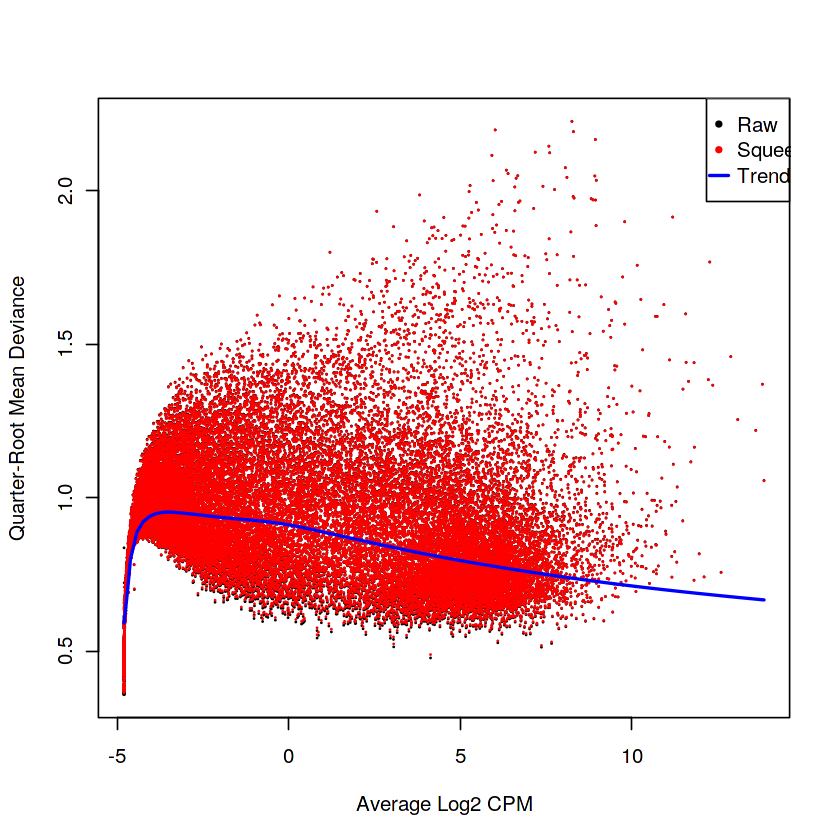

In [27]:
summary(decideTests(lrt))
#plotMD(lrt)
#abline(h=c(-1, 1), col="blue")

fitQL <- glmQLFit(y, design, robust = TRUE)
plotQLDisp(fitQL)

In [28]:
FDR <- p.adjust(lrt$table$PValue, method = "BH")
sum(FDR < 0.05)
lrt$table$logFC

[1] 2809

[1]  1.348588e+00  5.648915e+00 -1.652524e-01  8.280909e-01 -1.222411e+00
    [6]  6.043018e-01  2.617359e+00  5.612214e-01 -1.612028e+00  7.491803e-01
   [11] -3.002398e-01  1.070655e+00 -1.077570e+00  1.142538e+00  4.825187e-01
   [16]  8.038363e+00  1.208297e+00  1.651276e+00  5.834639e-01 -3.523517e-01
   [21] -7.166386e-02 -2.200102e+00  1.746296e-01 -4.885458e-01  4.401348e+00
   [26]  1.603073e+00  4.893402e+00  3.237574e+00 -2.015844e+00  7.827726e-02
   [31] -3.671014e-01  9.834200e-01  6.145640e-02 -6.576600e-01  1.955029e+00
   [36] -4.710475e-02  1.597346e+00 -1.579393e-01  8.641136e-01  4.189692e-01
   [41]  2.000046e+00 -8.090876e-01  4.730854e-01 -2.600172e-01  5.665424e-02
   [46] -7.410351e-01  2.495014e-01 -3.209877e-01 -2.574310e-01 -9.738027e-01
   [51]  1.099842e+00 -3.600175e-01 -1.703830e-01  1.701197e-02 -2.457543e+00
   [56]  1.499229e-01  1.100473e+00  7.282015e+00 -1.559293e+00 -2.160745e-01
   [61]  5.692257e+00  1.366359e+00  4.938237e+00 -1.499195e+00  3.940332e+00
   [66]  2.206637e-01  1.649264e-01  3.546475e-01  2.095011e+00  6.283528e+00
   [71] -2.763211e-02 -7.402810e-01  1.992860e+00  1.410589e-01  3.709747e-01
   [76] -5.812292e-01  1.068161e+00 -4.143360e+00 -1.305518e+00 -2.941715e-01
   [81] -1.112033e+00  1.050854e+00 -3.688324e-01 -5.356483e-01  1.586397e+00
   [86] -6.509938e-02  3.613008e-01 -1.086289e+00  4.779151e-01 -3.345339e-01
   [91]  1.985867e+00  2.721755e-01  1.283887e+00  1.131968e+00  7.336370e+00
   [96] -2.474468e-01 -4.967729e-01 -2.227055e+00 -2.363833e-01  2.361091e+00
  [101]  1.972771e+00 -1.432311e+00 -1.966727e+00  1.581800e+00 -4.324985e-01
  [106]  1.726659e+00  1.227797e+00  7.113413e-01  1.678142e+00  2.281471e-02
  [111]  5.950713e-01  9.454531e-02 -1.346057e+00  4.322604e+00  7.870686e-01
  [116] -2.273364e+00 -1.046730e+00 -8.219610e-01  6.889976e-01 -3.192563e+00
  [121]  2.552111e+00 -1.460117e-02  8.368054e-01  1.282892e+00 -1.511242e+00
  [126] -3.305025e-01  8.132853e+00  9.336959e-03 -2.130286e-01 -1.049558e+00
  [131] -1.228058e+00 -1.223101e-01 -4.396205e+00  2.658168e+00  5.369320e-01
  [136] -6.778975e-01  1.523963e+00  3.066156e+00 -1.922501e-01  3.311391e+00
  [141]  1.559245e+00  3.112010e-01 -4.620764e+00  6.901963e-01  2.517349e+00
  [146] -1.488846e+00 -7.170160e-01 -1.557105e-01 -2.717755e-01  1.105196e+00
  [151]  7.567011e-01  1.177860e-01 -2.476817e-01  4.343689e-01  5.916282e-01
  [156] -1.006402e-01  3.931733e+00  5.951058e-01  1.013236e-02  2.879479e+00
  [161]  2.199864e-01 -8.938673e-01  7.880488e-01 -3.262924e+00  2.838593e-01
  [166]  1.033219e+01 -1.014023e+00  5.068089e-01  7.274100e-01  4.282126e+00
  [171]  4.861292e+00  5.542368e-01  3.132083e+00  3.769977e+00 -1.937702e+00
  [176] -1.443056e+00  7.903126e+00 -7.627583e-01  4.564429e+00 -2.305220e-01
  [181]  2.611106e+00  1.372387e-01 -1.096288e+00  1.727114e-01 -4.493511e-01
  [186]  6.485010e-01  8.008610e-01 -5.594638e-01 -1.473514e-01  6.266099e-01
  [191]  4.672196e-01  5.900191e+00  1.508084e+00  3.330310e+00  5.039592e-02
  [196] -8.377799e-01 -7.600554e-01 -1.950445e+00  1.875466e+00  6.919164e-01
  [201]  1.385476e+00 -1.845713e+00 -7.176289e-01  3.837024e-01  2.084530e+00
  [206] -1.412001e+00  2.284287e+00  8.787365e-01  2.554212e-01  3.419219e-01
  [211] -6.634955e-02  5.641286e-01 -8.761494e-01  1.846841e+00 -5.031681e-01
  [216] -6.195281e-01 -1.433768e+00 -8.769324e-02  5.183182e-01  2.321238e+00
  [221]  9.341778e-01  1.101424e+00  1.264746e+00 -8.904545e-01  3.172339e-01
  [226] -3.071416e-01  1.528291e-01  2.925720e-01  7.943442e-01  3.785648e-01
  [231] -9.403335e-01  1.171171e+00  5.907899e-01  1.808966e+00  4.237810e+00
  [236]  5.220964e+00  2.138878e+00  2.167987e+00  3.648087e-02  5.573330e-01
  [241] -1.128238e+00  6.582061e-01 -1.243739e+00 -1.952815e-01  1.888709e+00
  [246] -1.296681e+00  4.696466e-01 -8.781077e-02 -3.717473e-01  4.082979e-01
  [251] -2.519849e-01 -1.192450e-01 -5.126381e-01  6.883148e+00 -1.058253e+00
  [256]  1.144432e+00  5.5

In [29]:
sum(abs(lrt$table$logFC) > 1)
sum(abs(lrt$table$logFC) > 2)
sum(abs(lrt$table$logFC) > 2.5)

#?topTags
topTags(lrt)

[1] 24545

[1] 11438

[1] 7707

,genes,logFC,logCPM,LR,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000131650,ENSG00000131650,-6.867596,4.1028468,119.74592,7.190509e-28,4.062134e-23
ENSG00000266975,ENSG00000266975,-8.633549,-3.9452620,110.67403,6.974583e-26,1.970076e-21
ENSG00000164850,ENSG00000164850,-5.221933,1.7508491,107.14919,4.128875e-25,7.775085e-21
ENSG00000197757,ENSG00000197757,-5.526695,1.3239713,98.24669,3.693781e-23,5.216820e-19
ENSG00000278966,ENSG00000278966,-5.791468,0.4158706,95.41776,1.541646e-22,1.741844e-18
ENSG00000272071,ENSG00000272071,-7.389633,-2.5389003,91.59868,1.061637e-21,9.995840e-18
ENSG00000127191,ENSG00000127191,-3.770449,5.2521072,86.92024,1.129873e-20,8.920091e-17
ENSG00000089116,ENSG00000089116,-6.892006,1.0544713,86.69967,1.263178e-20,8.920091e-17
ENSG00000037965,ENSG00000037965,-5.977971,0.6403086,85.82666,1.964200e-20,1.232928e-16


In [30]:
topTags(lrt, n = 3000, sort.by = "logFC", adjust.method = "BH", p.value = 0.01)  # sort.by = "logFC" "PValue"
degres = topTags(lrt, n = 3000, sort.by = "logFC", adjust.method = "BH", p.value = 0.01) # sort.by = "logFC" "PValue"

head(degres$table)
#rownames(degres$table)

,genes,logFC,logCPM,LR,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000268940,ENSG00000268940,-11.128062,-1.15223399,20.91443,4.802621e-06,4.455081e-04
ENSG00000269586,ENSG00000269586,-10.596883,-0.18772597,24.76915,6.462362e-07,8.431368e-05
ENSG00000261146,ENSG00000261146,-9.954732,-2.42230182,14.14949,1.688432e-04,7.558206e-03
ENSG00000248131,ENSG00000248131,-9.750136,-2.38112266,28.69336,8.479392e-08,1.607834e-05
ENSG00000244040,ENSG00000244040,9.638037,-1.85547716,18.54286,1.661263e-05,1.189477e-03
ENSG00000164438,ENSG00000164438,-9.305749,0.13380213,28.50581,9.341756e-08,1.696253e-05
ENSG00000123584,ENSG00000123584,-9.288174,-2.08920638,14.06892,1.762322e-04,7.774425e-03
ENSG00000231431,ENSG00000231431,-8.877333,-0.88538257,37.90168,7.440117e-10,2.677163e-07
ENSG00000185247,ENSG00000185247,-8.775365,2.86535069,40.98740,1.532138e-10,6.815358e-08


,genes,logFC,logCPM,LR,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000268940,ENSG00000268940,-11.128062,-1.1522340,20.91443,4.802621e-06,4.455081e-04
ENSG00000269586,ENSG00000269586,-10.596883,-0.1877260,24.76915,6.462362e-07,8.431368e-05
ENSG00000261146,ENSG00000261146,-9.954732,-2.4223018,14.14949,1.688432e-04,7.558206e-03
ENSG00000248131,ENSG00000248131,-9.750136,-2.3811227,28.69336,8.479392e-08,1.607834e-05
ENSG00000244040,ENSG00000244040,9.638037,-1.8554772,18.54286,1.661263e-05,1.189477e-03
ENSG00000164438,ENSG00000164438,-9.305749,0.1338021,28.50581,9.341756e-08,1.696253e-05


In [31]:
a = subset(grouped_counts, rownames(grouped_counts) %in% rownames(degres$table))
#View(a)
dim(a)

head(degres$table)

[1] 1393  546

,genes,logFC,logCPM,LR,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000268940,ENSG00000268940,-11.128062,-1.1522340,20.91443,4.802621e-06,4.455081e-04
ENSG00000269586,ENSG00000269586,-10.596883,-0.1877260,24.76915,6.462362e-07,8.431368e-05
ENSG00000261146,ENSG00000261146,-9.954732,-2.4223018,14.14949,1.688432e-04,7.558206e-03
ENSG00000248131,ENSG00000248131,-9.750136,-2.3811227,28.69336,8.479392e-08,1.607834e-05
ENSG00000244040,ENSG00000244040,9.638037,-1.8554772,18.54286,1.661263e-05,1.189477e-03
ENSG00000164438,ENSG00000164438,-9.305749,0.1338021,28.50581,9.341756e-08,1.696253e-05


In [32]:
write.table(a, file = "./degcounts_3000_nhsc.txt", sep = "\t", row.names = TRUE, col.names = NA)
degcounts_stn = a[,1:50]
degcounts_pst = a[,51:421]
degcounts_mst = a[,422:424]

write.table(degcounts_stn, file = "./degcounts_3000_stn.txt", sep = "\t", row.names = TRUE, col.names = NA)
write.table(degcounts_pst, file = "./degcounts_3000_pst.txt", sep = "\t", row.names = TRUE, col.names = NA)
write.table(degcounts_mst, file = "./degcounts_3000_mst.txt", sep = "\t", row.names = TRUE, col.names = NA)

rlog_lihc_stn = rlog_hnsc[,stn_samples_id]
rlog_lihc_pst = rlog_hnsc[,pst_samples_id]
rlog_lihc_mst = rlog_hnsc[,mst_samples_id]


In [33]:
b = subset(rlog_hnsc, rownames(rlog_hnsc) %in% rownames(degres$table))
# View(b)
dim(b)

rlog_deg_stn = b[,stn_samples_id]
rlog_deg_pst = b[,pst_samples_id]
rlog_deg_mst = b[,mst_samples_id]

write.table(rlog_deg_stn, file = "./rlog_deg_stn_ens.txt", sep = "\t", row.names = TRUE, col.names = NA)
write.table(rlog_deg_pst, file = "./rlog_deg_pst_ens.txt", sep = "\t", row.names = TRUE, col.names = NA)
write.table(rlog_deg_mst, file = "./rlog_deg_mst_ens.txt", sep = "\t", row.names = TRUE, col.names = NA)

head(rownames(degres$table))

[1] 1393  546

[1] "ENSG00000268940" "ENSG00000269586" "ENSG00000261146" "ENSG00000248131"
[5] "ENSG00000244040" "ENSG00000164438"

In [34]:
degn_3000 = rownames(degres$table)

write.table(degn_3000, file = "./nhsc_degnames_3000.txt", sep = "\t", col.names = NA)

write.table(colData_dds, file = "./colData_nhsc_full.txt", sep = "\t", row.names = TRUE, col.names = NA)

ls()

[1] "a"                         "auth"                     
 [3] "b"                         "colData_dds"              
 [5] "coldata_hnsc"              "coldata_hnsc1"            
 [7] "counts_hnsc"               "counts_hnsc_mst"          
 [9] "counts_hnsc_pst"           "counts_hnsc_stn"          
[11] "d"                         "dds"                      
[13] "dds1"                      "degcounts_mst"            
[15] "degcounts_pst"             "degcounts_stn"            
[17] "degn_3000"                 "degres"                   
[19] "design"                    "FDR"                      
[21] "fit"                       "fitQL"                    
[23] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
[25] "grouped_counts"            "hnsc.exp"                 
[27] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
[29] "KAGGLE_USER_SECRETS_TOKEN" "keep"                     
[31] "lrt"                       "mst_samples_id"           
[33] "o"                         "pst_samples_id"           
[35] "query.exp.hnsc"            "rld"                      
[37] "rlog_deg_mst"              "rlog_deg_pst"             
[39] "rlog_deg_stn"              "rlog_hnsc"                
[41] "rlog_hnsc_mst"             "rlog_hnsc_pst"            
[43] "rlog_hnsc_stn"             "rlog_lihc_mst"            
[45] "rlog_lihc_pst"             "rlog_lihc_stn"            
[47] "samples"                   "samples_mme_hnsc"         
[49] "stn_samples_id"            "Tissue"                   
[51] "TokenBigQueryKernel"       "y"                        
[53] "y1"

In [35]:
rm(a, b, d, counts_c, counts_hnsc_stn, counts_hnsc_pst, counts_hnsc_mst, dds, dds1, degcounts_stn, degcounts_pst, 
   degcounts_mst, grouped_counts, hnsc.exp, query.exp.hnsc, samples, samples_mme_hnsc, rld, rlog_deg_stn, 
   rlog_deg_pst, rlog_deg_mst, rlog_hnsc, rlog_hnsc_stn, rlog_hnsc_pst, rlog_hnsc_mst)
save.image("./nhsc_RNASeq_DEG_3000.RData")

ls()

save.image("./nhsc_RNASeq_DEG_3000.RData")


Warning message in rm(a, b, d, counts_c, counts_hnsc_stn, counts_hnsc_pst, counts_hnsc_mst, :
“object 'counts_c' not found”


[1] "auth"                      "colData_dds"              
 [3] "coldata_hnsc"              "coldata_hnsc1"            
 [5] "counts_hnsc"               "degn_3000"                
 [7] "degres"                    "design"                   
 [9] "FDR"                       "fit"                      
[11] "fitQL"                     "get_user_secret"          
[13] "GET_USER_SECRET_ENDPOINT"  "KAGGLE_BASE_URL"          
[15] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[17] "keep"                      "lrt"                      
[19] "mst_samples_id"            "o"                        
[21] "pst_samples_id"            "rlog_lihc_mst"            
[23] "rlog_lihc_pst"             "rlog_lihc_stn"            
[25] "stn_samples_id"            "Tissue"                   
[27] "TokenBigQueryKernel"       "y"                        
[29] "y1"